In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [5]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()
Base.prepare(engine, reflect=True)

# Use the Base class to reflect the database tables


C:\Users\karki\AppData\Local\Temp\ipykernel_17120\3348060543.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [8]:
# Print all of the classes mapped to the Base
Station = Base.classes.station
Station
Measurement = Base.classes.measurement
Measurement

sqlalchemy.ext.automap.measurement

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`


In [9]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date = most_recent_date[0]

In [13]:
most_recent_date

'2017-08-23'

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
last_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()
last_year_data

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_last_year = pd.DataFrame(last_year_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
df_last_year = df_last_year.sort_values('date')
df_last_year.head()



,date,precipitation
0,2016-08-23,0.0
1009,2016-08-23,NaN
1529,2016-08-23,45.5
704,2016-08-23,1.3
361,2016-08-23,3.8


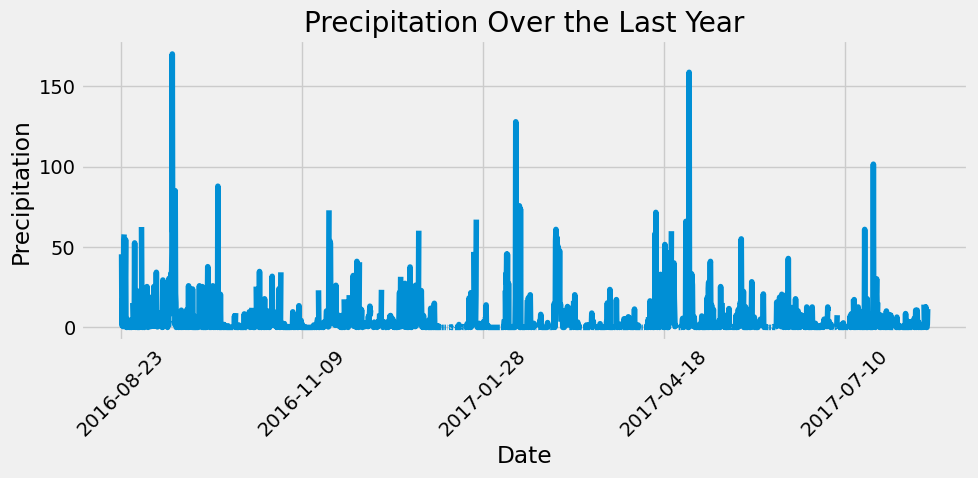

In [22]:
# Use Pandas Plotting with Matplotlib to plot the data
df_last_year.plot(x='date', y='precipitation', title='Precipitation Over the Last Year', figsize=(10, 5), legend=False)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_summary = df_last_year['precipitation'].describe().round(1)
print(precipitation_summary)

count    2021.0
mean        4.5
std        11.7
min         0.0
25%         0.0
50%         0.5
75%         3.3
max       170.2
Name: precipitation, dtype: float64


In [ ]:
session.close()

# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(Station).count()
print(f'Total stations: {num_stations}')

Total stations: 9


In [29]:
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station))\
                          .group_by(Measurement.station)\
                          .order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
most_active_station = station_activity[0][0]
most_active_station

'USC00519281'

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_stats = session.query(func.min(Measurement.tobs), 
                                  func.max(Measurement.tobs), 
                                  func.avg(Measurement.tobs))\
                           .filter(Measurement.station == most_active_station).all()
min_temp, max_temp, avg_temp = temperature_stats[0]
print(f'Min temperature: {min_temp}, Max temperature: {max_temp}, Avg temperature: {avg_temp:.2f}')

Min temperature: 12.2, Max temperature: 29.4, Avg temperature: 22.04


In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_temps = session.query(Measurement.date, Measurement.tobs)\
                        .filter(Measurement.station == most_active_station)\
                        .filter(Measurement.date >= '2016-08-23').all()
last_year_temps

[('2016-08-23', 25.0),
 ('2016-08-24', 25.0),
 ('2016-08-25', 26.7),
 ('2016-08-26', 26.7),
 ('2016-08-27', 23.9),
 ('2016-08-28', 22.8),
 ('2016-08-29', 25.6),
 ('2016-08-30', 25.0),
 ('2016-08-31', 25.6),
 ('2016-09-01', 26.7),
 ('2016-09-02', 26.7),
 ('2016-09-03', 25.6),
 ('2016-09-04', 25.6),
 ('2016-09-05', 25.6),
 ('2016-09-06', 22.8),
 ('2016-09-07', 23.3),
 ('2016-09-08', 26.7),
 ('2016-09-09', 26.1),
 ('2016-09-10', 25.0),
 ('2016-09-11', 26.7),
 ('2016-09-12', 24.4),
 ('2016-09-13', 26.1),
 ('2016-09-14', 23.9),
 ('2016-09-15', 26.1),
 ('2016-09-16', 25.6),
 ('2016-09-17', 26.1),
 ('2016-09-18', 25.6),
 ('2016-09-19', 25.6),
 ('2016-09-20', 24.4),
 ('2016-09-21', 23.3),
 ('2016-09-22', 25.0),
 ('2016-09-23', 25.6),
 ('2016-09-24', 26.1),
 ('2016-09-25', 26.1),
 ('2016-09-26', 25.0),
 ('2016-09-27', 26.7),
 ('2016-09-28', 25.6),
 ('2016-09-29', 25.6),
 ('2016-09-30', 25.6),
 ('2016-10-01', 25.0),
 ('2016-10-02', 26.1),
 ('2016-10-03', 26.1),
 ('2016-10-04', 26.1),
 ('2016-10-

In [37]:
df_last_year_temps = pd.DataFrame(last_year_temps, columns=['date', 'tobs'])
df_last_year_temps

,date,tobs
0,2016-08-23,25.0
1,2016-08-24,25.0
2,2016-08-25,26.7
3,2016-08-26,26.7
4,2016-08-27,23.9
...,...,...
347,2017-08-14,25.0
348,2017-08-15,25.0
349,2017-08-16,24.4
350,2017-08-17,24.4


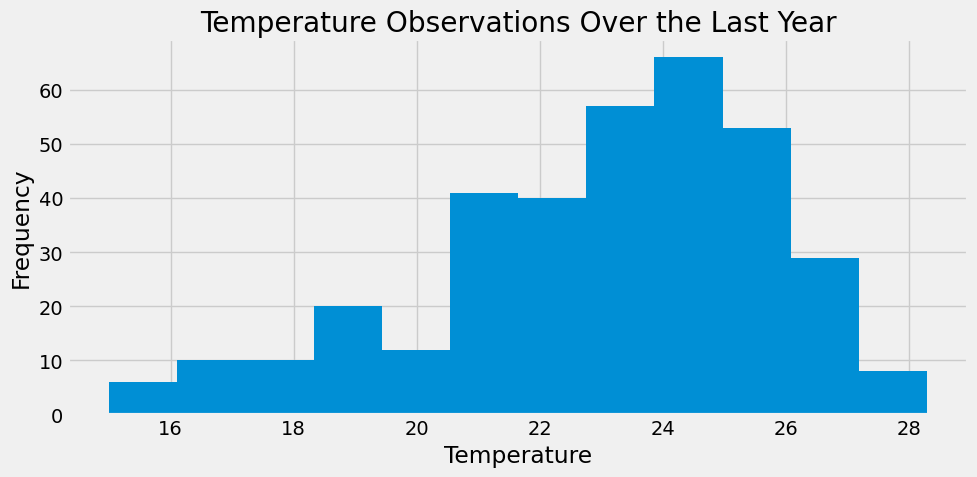

In [39]:
df_last_year_temps['tobs'].plot(kind='hist', bins=12, title='Temperature Observations Over the Last Year', figsize=(10, 5))
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()


In [2]:
# Import the dependencies.
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import datetime as dt


#################################################
# Database Setup
#################################################

# Create engine using the `hawaii.sqlite` database file
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Declare a Base using `automap_base()`
Base = automap_base()
Base.prepare(engine, reflect=True)
# Use the Base class to reflect the database tables
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Station = Base.classes.station

Measurement = Base.classes.measurement


# Create a session

session = Session(engine)
#################################################
# Flask Setup
#################################################
from flask import Flask, jsonify

app = Flask(__name__)

# Flask Routes
#################################################

@app.route("/")
def welcome():
    return (
        f"Welcome to the Climate API!<br/>"
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<start><br/>"
        f"/api/v1.0/<start>/<end><br/>"
    )

#Route to the precep
@app.route("/api/v1.0/precipitation")
def precipitation():
    # Quering precipitation data for last year
    precip_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()
    
    # Creating a dictionary from the data
    precip_dict = {date: prcp for date, prcp in precip_data}
    
    return jsonify(precip_dict)

@app.route("/api/v1.0/stations")
def stations():
    # Quering all stations
    stations = session.query(Station.station).all()
    
    # Convert list of tuples into a normal list
    stations_list = list(np.ravel(stations))
    
    return jsonify(stations_list)


# route for the most active station.
@app.route("/api/v1.0/tobs")
def tobs():
    # Quering the dates and temperature observations of the most active station for the last year
    tobs_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= '2016-08-23').all()
    
    # Convert list of tuples into a normal list
    tobs_list = list(np.ravel(tobs_data))
    
    return jsonify(tobs_list)


# route for the start and end.
@app.route("/api/v1.0/<start>")
@app.route("/api/v1.0/<start>/<end>")
def start_end(start=None, end=None):
    # Query to calculate TMIN, TAVG, and TMAX for dates
    if not end:
        temp_stats = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.date >= start).all()
    else:
        temp_stats = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    
    # Converting list of tuples into a normal list
    temp_stats_list = list(np.ravel(temp_stats))
    
    return jsonify(temp_stats_list)




if __name__ =="__main__":
    app.run(debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [05/Aug/2024 14:18:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2024 14:19:52] "GET /api/v1.0// HTTP/1.1" 404 -
